<a href="https://colab.research.google.com/github/zion645/img_recog_cnn/blob/master/banana_strawberry_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! unzip /content/fruits-small.zip

Archive:  /content/fruits-small.zip
   creating: fruits-small/
   creating: fruits-small/data/
   creating: fruits-small/data/Training/
   creating: fruits-small/data/Training/Banana/
  inflating: fruits-small/data/Training/Banana/0_100.jpg  
  inflating: fruits-small/data/Training/Banana/104_100.jpg  
  inflating: fruits-small/data/Training/Banana/107_100.jpg  
  inflating: fruits-small/data/Training/Banana/10_100.jpg  
  inflating: fruits-small/data/Training/Banana/112_100.jpg  
  inflating: fruits-small/data/Training/Banana/117_100.jpg  
  inflating: fruits-small/data/Training/Banana/118_100.jpg  
  inflating: fruits-small/data/Training/Banana/119_100.jpg  
  inflating: fruits-small/data/Training/Banana/11_100.jpg  
  inflating: fruits-small/data/Training/Banana/120_100.jpg  
  inflating: fruits-small/data/Training/Banana/121_100.jpg  
  inflating: fruits-small/data/Training/Banana/122_100.jpg  
  inflating: fruits-small/data/Training/Banana/123_100.jpg  
  inflating: fruits-small/d

In [ ]:
import tensorflow as tf

In [ ]:
#preprocessing, the goal is to make the data compatible for CNN... this means that all images have to be same size
#this is how we determine the size of the image that needs to be reducecd to
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

In [ ]:
#pass the images through the generator
trainImageData = train_generator.flow_from_directory("fruits-small/data/Training/",
                                                     batch_size=32, #the amunt of images to give per iteration in an epoch
                                                     class_mode="binary", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     )


testImageData = train_generator.flow_from_directory("fruits-small/data/Validation/",
                                                     batch_size=32, #how much images to give per iteration in an epoch
                                                     class_mode="binary", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     )


Found 982 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


In [ ]:
#Given dataset is a balanced dataset !!!

trainImageData.class_indices

{'Banana': 0, 'Strawberry': 1}

In [ ]:
trainImageData.filenames

['Banana/0_100.jpg',
 'Banana/104_100.jpg',
 'Banana/107_100.jpg',
 'Banana/10_100.jpg',
 'Banana/112_100.jpg',
 'Banana/117_100.jpg',
 'Banana/118_100.jpg',
 'Banana/119_100.jpg',
 'Banana/11_100.jpg',
 'Banana/120_100.jpg',
 'Banana/121_100.jpg',
 'Banana/122_100.jpg',
 'Banana/123_100.jpg',
 'Banana/124_100.jpg',
 'Banana/125_100.jpg',
 'Banana/126_100.jpg',
 'Banana/127_100.jpg',
 'Banana/128_100.jpg',
 'Banana/129_100.jpg',
 'Banana/130_100.jpg',
 'Banana/131_100.jpg',
 'Banana/132_100.jpg',
 'Banana/133_100.jpg',
 'Banana/134_100.jpg',
 'Banana/135_100.jpg',
 'Banana/136_100.jpg',
 'Banana/137_100.jpg',
 'Banana/138_100.jpg',
 'Banana/139_100.jpg',
 'Banana/140_100.jpg',
 'Banana/141_100.jpg',
 'Banana/142_100.jpg',
 'Banana/143_100.jpg',
 'Banana/144_100.jpg',
 'Banana/145_100.jpg',
 'Banana/146_100.jpg',
 'Banana/147_100.jpg',
 'Banana/148_100.jpg',
 'Banana/149_100.jpg',
 'Banana/150_100.jpg',
 'Banana/151_100.jpg',
 'Banana/152_100.jpg',
 'Banana/153_100.jpg',
 'Banana/154_10

In [ ]:
# ARchitect the model

model = tf.keras.models.Sequential()

#Convolution Layer
#================================================================================================================================================
#First Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape= trainImageData.image_shape , activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling

#Second Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling

#=================================================================================================================================================
# Flatten

model.add(tf.keras.layers.Flatten())

#=================================================================================================================================================
# ANN
model.add(tf.keras.layers.Dense(units= 4096 , activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 256, activation="relu"))
model.add(tf.keras.layers.Dense(units= 1 , activation="sigmoid"))
#model.add(tf.keras.layers.Dense(units= 2 , activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 4096)              1

In [ ]:
#Compile

model.compile(optimizer="adam",
              loss="binary_crossentropy", #For multi-class classification: categorical_crossentropy | sparse_categorical_crossentropy
              metrics=['accuracy'])

In [ ]:
len(trainImageData.filenames) // trainImageData.batch_size

30

In [ ]:
# Fit the model

model.fit(trainImageData,
          validation_data=testImageData,
          epochs=10,
          steps_per_epoch = len(trainImageData.filenames) // trainImageData.batch_size,
          validation_steps= len(testImageData.filenames) // testImageData.batch_size)

Epoch 1/10
30/30 [==============================] - 15s 77ms/step - loss: 0.4415 - accuracy: 0.8726 - val_loss: 2.5962e-07 - val_accuracy: 1.0000
Epoch 2/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0037 - accuracy: 0.9979 - val_loss: 1.9874 - val_accuracy: 0.8625
Epoch 3/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0631 - accuracy: 0.9853 - val_loss: 9.6471e-11 - val_accuracy: 1.0000
Epoch 4/10
30/30 [==============================] - 1s 31ms/step - loss: 1.3432e-10 - accuracy: 1.0000 - val_loss: 5.1335e-11 - val_accuracy: 1.0000
Epoch 5/10
30/30 [==============================] - 1s 31ms/step - loss: 1.4957e-10 - accuracy: 1.0000 - val_loss: 4.9844e-11 - val_accuracy: 1.0000
Epoch 6/10
30/30 [==============================] - 1s 30ms/step - loss: 1.7781e-10 - accuracy: 1.0000 - val_loss: 4.8634e-11 - val_accuracy: 1.0000
Epoch 7/10
30/30 [==============================] - 1s 34ms/step - loss: 1.9734e-10 - accuracy: 1.0000 - val_loss: 4.9008

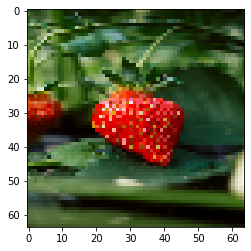

In [ ]:
#Deployment

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('strawberry10.jpg', target_size=(64,64))
plt.imshow(imageToPredict)

In [ ]:
# Step 2 - Convert image to numpy array

myimagenparray = tf.keras.preprocessing.image.img_to_array(imageToPredict)

myimagenparray.shape

(64, 64, 3)

In [ ]:
#Step 3 - Make the image compatible for the model by adding n

mycompatibleimage = np.expand_dims(myimagenparray, axis=0)
mycompatibleimage.shape

(1, 64, 64, 3)

In [ ]:
#Step 4 - Prediction

prediction = model.predict(mycompatibleimage)

In [ ]:
if prediction == 0:
  print("Its a Banana!")
else:
  print("Its a Strawberry!")

Its a Strawberry!
